In [1]:
# 3. Тип занятости и доход
# Гипотеза: предприниматели в среднем зарабатывают больше, чем наёмные рабочие.
# Дополнительный анализ:
#  - Сколько среди предпринимателей мужчин и женщин?
# - Отличается ли количество рабочих часов у предпринимателей и наёмных рабочих?
# - Уровень образования предпринимателей (какая доля имеет высшее образование)
# - Какой уровень образования у предпринимателей с высоким доходом?
# - Сравнить доход предпринимателей с высшим образованием и без него
# - Сравнить доход предпринимателей без высшего образования и наёмных рабочих

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataframes import dataframes

# Создание датафрейма

Составим список необходимых в ходе работы столбцов

In [3]:
# Список нужных столбцов
columns_needed = ['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc']

Создаём пустой датафрейм для объединения

In [4]:
# Создаём пустой датафрейм для объединения
df = pd.DataFrame()

Отбираем нужные столбцы из каждого датафрейма

In [5]:
# Проходим по каждому датафрейму
for year, dd in dataframes.items():
    available_columns = [col for col in columns_needed if col in dd.columns]
    print(available_columns, year)
    if available_columns:
        temp_df = dd[available_columns].copy()
        temp_df['year'] = int(year)  # Добавляем год опроса
        df = pd.concat([df, temp_df], ignore_index=True)

['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc'] 2010
['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc'] 2012
['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc'] 2014
['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc'] 2016
['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc'] 2018
['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc'] 2021
['wrkslf', 'sex', 'hrs1', 'hrs2', 'degree', 'realrinc'] 2022


Отображение нового датафрейма и его размеров

In [6]:
# Проверяем результат
print("Размер нового датафрейма:", df.shape)
print("\nПервые 50 строк датафрейма:")
print(df.iloc[:50])

# Проверяем, какие столбцы в итоге есть
print("\nСтолбцы в новом датафрейме:", df.columns.tolist())

Размер нового датафрейма: (19952, 7)

Первые 50 строк датафрейма:
    wrkslf  sex  hrs1  hrs2  degree  realrinc  year
0      2.0  1.0  55.0   NaN     3.0   42735.0  2010
1      2.0  2.0  45.0   NaN     3.0    3885.0  2010
2      2.0  2.0   NaN   NaN     0.0       NaN  2010
3      NaN  2.0   NaN   NaN     0.0       NaN  2010
4      2.0  2.0   NaN   NaN     0.0       NaN  2010
5      2.0  1.0   NaN   NaN     0.0    5827.5  2010
6      2.0  2.0  45.0   NaN     2.0   42735.0  2010
7      2.0  2.0   NaN   NaN     2.0       NaN  2010
8      2.0  2.0  40.0   NaN     1.0       NaN  2010
9      2.0  2.0  48.0   NaN     1.0       NaN  2010
10     2.0  2.0  26.0   NaN     2.0   12302.5  2010
11     NaN  1.0   NaN   NaN     1.0       NaN  2010
12     2.0  1.0  40.0   NaN     1.0   19425.0  2010
13     NaN  2.0   NaN   NaN     1.0       NaN  2010
14     2.0  2.0   NaN   NaN     0.0       NaN  2010
15     2.0  2.0   NaN   NaN     0.0       NaN  2010
16     2.0  2.0   NaN   NaN     2.0       NaN  201

# Очистка данных

Проверка датафрейма на наличие пропусков

In [7]:
# Проверка на пропуски
print("Пропуски до очистки:")
print(df.isnull().sum())

Пропуски до очистки:
wrkslf        746
sex           115
hrs1         8723
hrs2        19551
degree         33
realrinc     8285
year            0
dtype: int64


Далее необходимо удалить все пропущенные значения в столбцах wrkslf, sex, hrs1, degree и realrinc, после чего проверяется размер датафрейма

In [8]:
# Удаление всех строк с NaN
cols_to_dropna = ['wrkslf', 'sex', 'hrs1', 'degree', 'realrinc']
df.dropna(subset=cols_to_dropna, inplace=True)
print('Размер датафрейма:', df.shape)

Размер датафрейма: (9513, 7)


В датафрейме осталось 9513 записей, что является достаточным количеством для проведения последующего анализа. После этого осуществляем проверку пропущенных и неопределенных значений в столбцах после очистки

In [9]:
# Проверка пропусков после очистки
print("Пропуски после очистки:")
print(df.isnull().sum())

Пропуски после очистки:
wrkslf         0
sex            0
hrs1           0
hrs2        9513
degree         0
realrinc       0
year           0
dtype: int64


Оставшиеся в столбце hrs2 пропуски заменим на значение "0", чтобы сложить их в дальнейшем с hrs1

In [10]:
# Замена всех NaN в столбце hrs2 на "0"
df['hrs2'] = df['hrs2'].fillna(0)
print('Размер датафрейма:', df.shape)
print("Пропуски после очистки:")
print(df.isnull().sum())

Размер датафрейма: (9513, 7)
Пропуски после очистки:
wrkslf      0
sex         0
hrs1        0
hrs2        0
degree      0
realrinc    0
year        0
dtype: int64


Объединение hrs1 (кол-во часов, проведенных на основной работе) и hrs2 (кол-во часов, проведенных на дополнительной работе) в единый столбец hrs

In [11]:
# Объединяем hrs1 и hrs2 в единый столбец
df['hrs'] = df['hrs1'] + df['hrs2']

Исходные столбцы при этом удаляются

In [12]:
# Исходные столбцы, связанные с кол-вом рабочих часов, удаляются из df
df.drop(['hrs1', 'hrs2'], axis=1, inplace=True)

Проверим текущий размер датафрейма (столбцов должно стать 6) и выведем на экран первые его 50 строк

In [13]:
print('Размер датафрейма:', df.shape)
print(df.iloc[:50])

Размер датафрейма: (9513, 6)
     wrkslf  sex  degree  realrinc  year   hrs
0       2.0  1.0     3.0   42735.0  2010  55.0
1       2.0  2.0     3.0    3885.0  2010  45.0
6       2.0  2.0     2.0   42735.0  2010  45.0
10      2.0  2.0     2.0   12302.5  2010  26.0
12      2.0  1.0     1.0   19425.0  2010  40.0
19      2.0  1.0     3.0   42735.0  2010  50.0
20      2.0  1.0     1.0   28490.0  2010  40.0
21      2.0  1.0     1.0   28490.0  2010  25.0
24      2.0  2.0     4.0   34965.0  2010  20.0
25      2.0  2.0     3.0   62160.0  2010  89.0
27      2.0  2.0     2.0    1036.0  2010  25.0
28      2.0  2.0     3.0   34965.0  2010  40.0
29      1.0  2.0     3.0   23310.0  2010  20.0
34      2.0  1.0     1.0   72520.0  2010  60.0
36      2.0  2.0     3.0    2331.0  2010   3.0
37      2.0  1.0     4.0   42735.0  2010  40.0
40      1.0  1.0     3.0    9712.5  2010  40.0
41      2.0  1.0     4.0   34965.0  2010  35.0
42      2.0  2.0     1.0   11007.5  2010  24.0
43      2.0  1.0     4.0   4273

Также посмотрим ключевую информацию о датафрейме

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9513 entries, 0 to 19951
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wrkslf    9513 non-null   float64
 1   sex       9513 non-null   float64
 2   degree    9513 non-null   float64
 3   realrinc  9513 non-null   float64
 4   year      9513 non-null   int64  
 5   hrs       9513 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 520.2 KB


Проверим данные на наличие выбросов. Начнем со столбца "realrinc", отображающего реальный доход человека после вычета налогов:

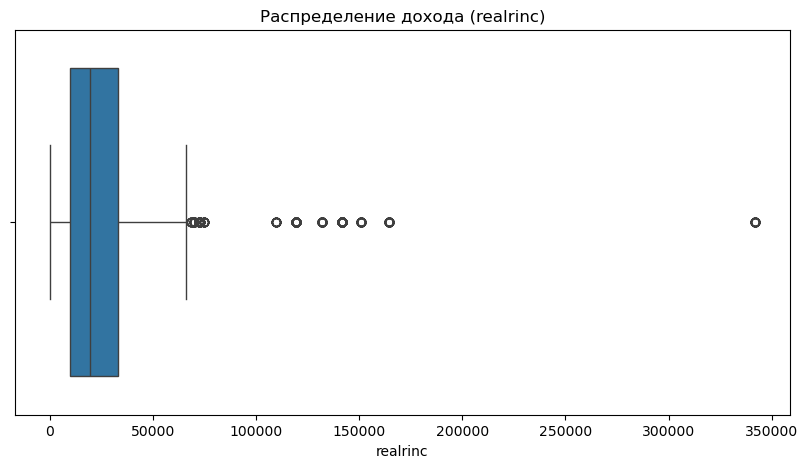

In [15]:
# Проверяем наличие выбросов в столбце "realrinc"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['realrinc'])
plt.title('Распределение дохода (realrinc)')
plt.show()

Такое распределение является вполне естественным, поскольку выборка допускает наличие в ней граждан, имеющих аномально высокий доход. Поэтому такие результаты следует интерпретировать не как выбросы, а как достоверные показатели заработной платы. Очистку проводить нецелесообразно.

Проверим столбец hrs (количество рабочих часов) на наличие выбросов:

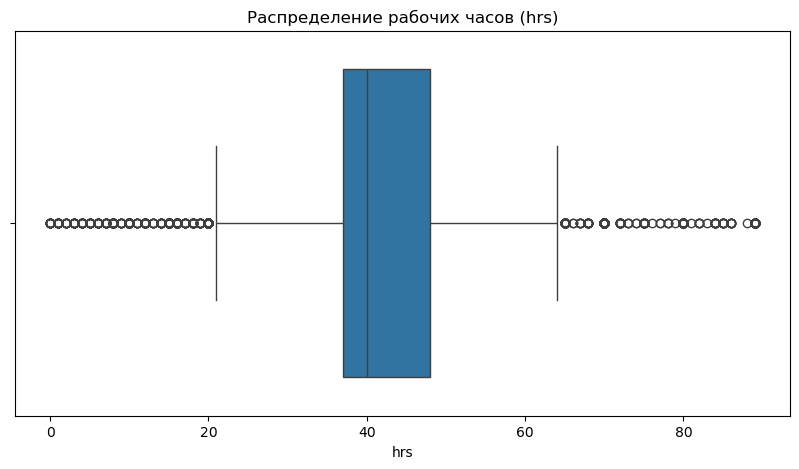

In [16]:
# Проверяем наличие выбросов в столбце "hrs"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['hrs'])
plt.title('Распределение рабочих часов (hrs)')
plt.show()

В данном случае выбросов действительно много. Проверим их распределение в зависимости от типа занятости человека (самозанятый, наемный), а также отобразим на экране несколько случайных строк с hrs > 84 (работа 7 дней по 12 часов, все что больше - явная и однозначная переработка):

In [17]:

extreme_hours = df[df['hrs'] > 84]
n1 = df[(df['hrs'] > 84) & (df['wrkslf'] == 1)]
print("Количество самозанятых, работающих более 84 часов в неделю: ", len(n1))
n2 = df[(df['hrs'] > 84) & (df['wrkslf'] == 2)]
print("Количество наемных сотрудников, работающих более 84 часов в неделю: ", len(n2))
print(f"Количество респондентов > 84 часов: {len(extreme_hours)}")
print(extreme_hours[['year', 'wrkslf', 'hrs']].sample(25))

Количество самозанятых, работающих более 84 часов в неделю:  22
Количество наемных сотрудников, работающих более 84 часов в неделю:  62
Количество респондентов > 84 часов: 84
       year  wrkslf   hrs
3244   2012     2.0  89.0
11314  2018     2.0  89.0
1643   2010     1.0  89.0
16029  2022     1.0  89.0
11259  2018     2.0  89.0
9035   2016     1.0  89.0
6330   2014     2.0  89.0
692    2010     2.0  89.0
9225   2016     2.0  89.0
5117   2014     2.0  89.0
19199  2022     2.0  89.0
25     2010     2.0  89.0
4603   2014     2.0  89.0
2326   2012     2.0  89.0
6028   2014     2.0  89.0
18307  2022     2.0  85.0
4967   2014     2.0  89.0
17223  2022     1.0  85.0
11290  2018     2.0  86.0
2371   2012     2.0  85.0
15265  2021     1.0  89.0
1646   2010     2.0  89.0
1632   2010     2.0  89.0
16809  2022     2.0  89.0
12697  2021     2.0  89.0


Так как данных со значением hrs > 84 довольно много, то это говорит о реальности таких случаев, а не о случайных ошибках. Поэтому стоит ограничиться  предельным значением 84 для данного столбца. Кроме того, стоит также добавить нижний предел, поскольку кол-во рабочих часов менее 10 в неделю говорит скорее о разовой/частичной подработке, а не о постоянном месте труда и, соответственно, дохода:

In [18]:
# Ограничиваем минимальное и максимальное значение рабочих часов (84 часа - максимальный предел для человека, 7 дней по 12 часов)
df['hrs'] = df['hrs'].clip(lower=10, upper=84)

Также не лишним будет преобразовать переменные wrkslf и sex в бинарные:

In [19]:
df['sex'] = df['sex'].replace({1: 0, 2: 1}) # теперь мужчины - 0, женщины - 1
df['wrkslf'] = df['wrkslf'].replace({1: 0, 2: 1}) # теперь самозанятые - 0, наемные рабочие - 1

In [20]:
df.head(20)

,wrkslf,sex,degree,realrinc,year,hrs
0,1.0,0.0,3.0,42735.0,2010,55.0
1,1.0,1.0,3.0,3885.0,2010,45.0
6,1.0,1.0,2.0,42735.0,2010,45.0
10,1.0,1.0,2.0,12302.5,2010,26.0
12,1.0,0.0,1.0,19425.0,2010,40.0
19,1.0,0.0,3.0,42735.0,2010,50.0
20,1.0,0.0,1.0,28490.0,2010,40.0
21,1.0,0.0,1.0,28490.0,2010,25.0
24,1.0,1.0,4.0,34965.0,2010,20.0
25,1.0,1.0,3.0,62160.0,2010,84.0


# Описательная статистика

Далее необходимо отобразить наиболее важные статистические показатели датафрейма. Для числовых переменных это будут: кол-во значений, минимум и максимум, среднее арифметическое, медиана, 1-й и 3-й квартили, а также среднекваратическое отклонение. Для категориальных переменных: кол-во всех значений, кол-во уникальных значений, мода и ее численность. Эти показатели необходимы для дальнейшего анализа данных и решения последующих задач.

In [21]:
# Описательная статистика

# Для числовых столбцов
print("Числовые переменные:")
print(df[['hrs', 'realrinc']].describe().round(2))

# Для категориальных
print("\nКатегориальные переменные:")
print(df[['wrkslf', 'sex', 'degree']].astype('category').describe())

# Группировка по статусу занятости
print("\nСредние значения по группам:")
print(df.groupby('wrkslf')[['hrs', 'realrinc']].mean().round(2))

Числовые переменные:
           hrs   realrinc
count  9513.00    9513.00
mean     41.34   27702.41
std      13.52   33529.61
min      10.00     204.50
25%      37.00   10051.25
50%      40.00   19620.00
75%      48.00   33075.00
max      84.00  341672.38

Категориальные переменные:
        wrkslf     sex  degree
count   9513.0  9513.0  9513.0
unique     2.0     2.0     5.0
top        1.0     1.0     1.0
freq    8369.0  4827.0  4157.0

Средние значения по группам:
          hrs  realrinc
wrkslf                 
0.0     39.65  34077.68
1.0     41.57  26830.95


Промежуточные выводы:
1. Распределение в hrs близко к нормальному
2. Распределение в доходах имеет сильный перекос в правую сторону (богатое меньшинство) + большое стандартное отклонение
3. Наемных рабочих гораздо больше, чем самозанятых (88% против 12%)
4. Женщин чуть больше, чем мужчин (51% vs 49%)
5. Больше всего людей со школьным образованием (44%), характер распределения пока неизвестен и требует дополнительного анализа

# Визуализация данных

Определим характер распределения числовых факторов датафрейма. В случае столбца, содержащего кол-во рабочих часов, будет отображена обычная гистограмма, так как распределение близко к нормальному, исходя из полученных ранее результатов описательной статистики. Что касается распределения доходов, то здесь логичным решением будет применить логарифмирование, поскольку в данных имеется сильный перекос.

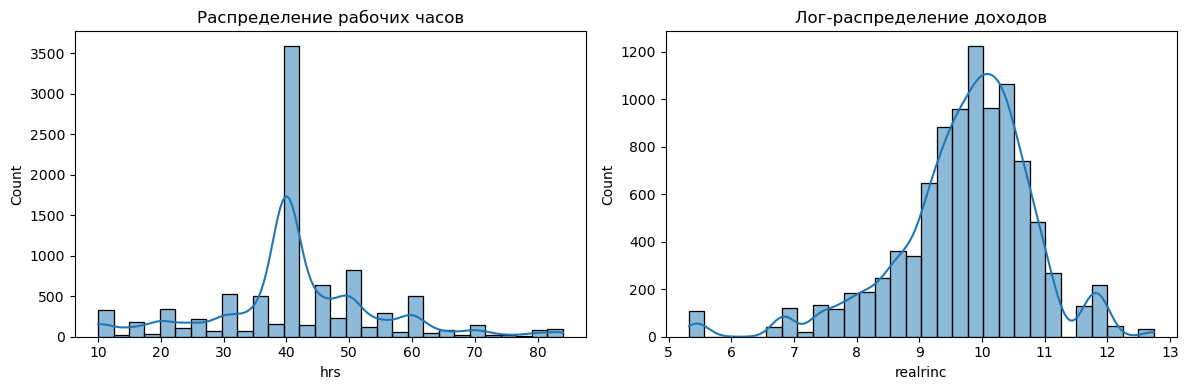

In [22]:
# Визуализация данных

plt.figure(figsize=(12, 4))

# Распределение часов работы
plt.subplot(1, 2, 1)
sns.histplot(df['hrs'], bins=30, kde=True)
plt.title('Распределение рабочих часов')

# Распределение доходов (логарифмическая шкала)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['realrinc']), bins=30, kde=True)
plt.title('Лог-распределение доходов')

plt.tight_layout()
plt.show()

Также проанализируем некоторые другие факторы

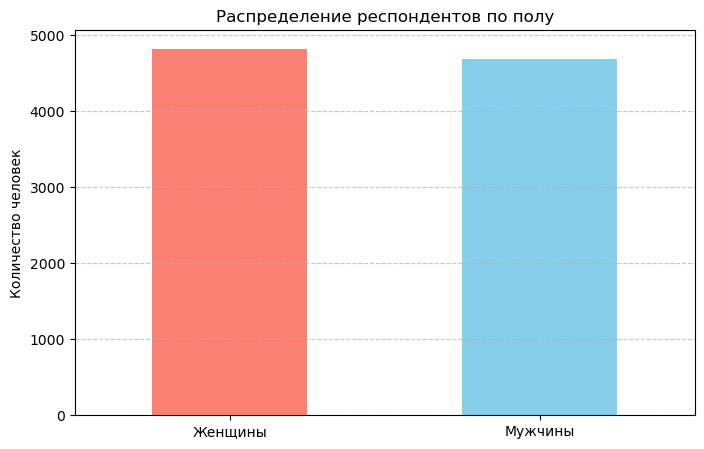

In [23]:
# Диаграмма с распределением по полу
plt.figure(figsize=(8, 5))
gender_counts = df['sex'].value_counts()
gender_counts.index = ['Женщины', 'Мужчины'] 
gender_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Распределение респондентов по полу')
plt.ylabel('Количество человек')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

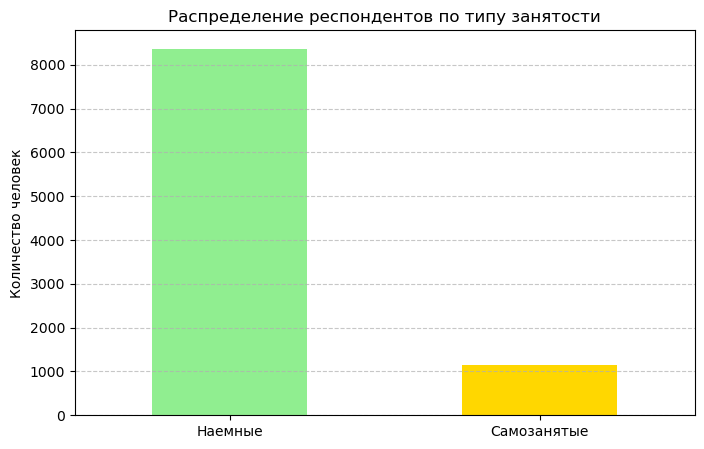

In [24]:
# Диаграмма с распределением по типу занятости (самозанятый, рабочий)
plt.figure(figsize=(8, 5))
employment_counts = df['wrkslf'].value_counts()
employment_counts.index = ['Наемные', 'Самозанятые']
employment_counts.plot(kind='bar', color=['lightgreen', 'gold'])
plt.title('Распределение респондентов по типу занятости')
plt.ylabel('Количество человек')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

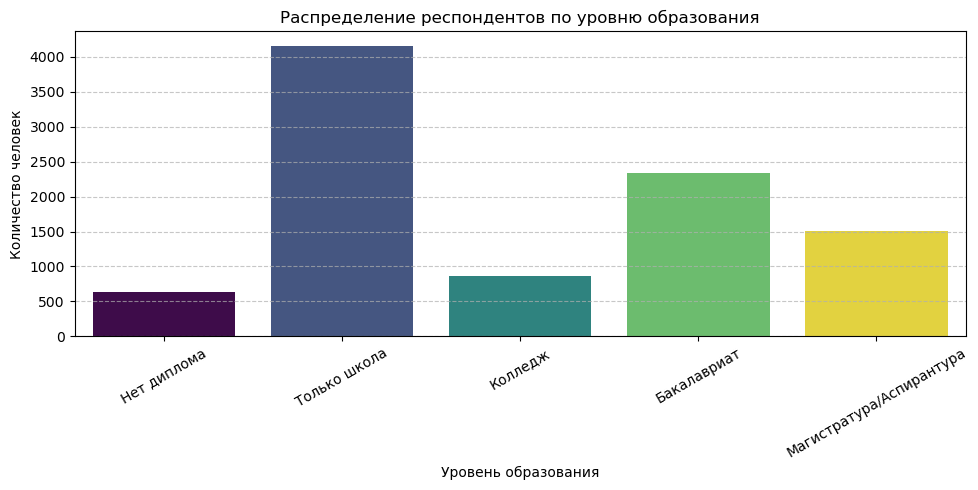

In [25]:
# Гистограмма для уровня образования
plt.figure(figsize=(10, 5))

# Создаем упорядоченный список категорий образования
education_order = sorted(df['degree'].unique())
ax = sns.countplot(x='degree', data=df, order=education_order, 
                  hue='degree', palette='viridis', legend=False)

# Устанавливаем подписи для категорий
degree_labels = {
    0: 'Нет диплома',
    1: 'Только школа',
    2: 'Колледж',
    3: 'Бакалавриат',
    4: 'Магистратура/Аспирантура'
}

ax.set_xticks(range(len(education_order)))
ax.set_xticklabels([degree_labels.get(x, x) for x in education_order])

plt.title('Распределение респондентов по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество человек')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Составим матрицу корреляций для выявления взаимосвязей между переменными:

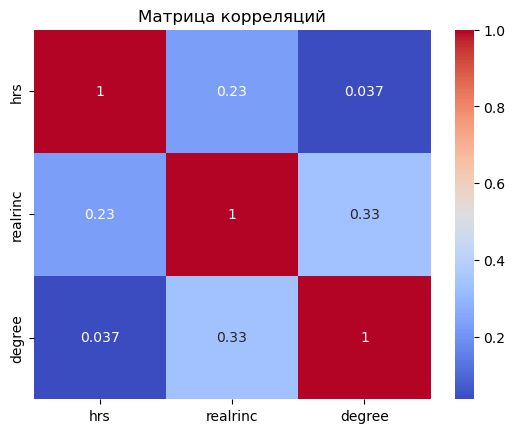

In [26]:
# Корреляционный анализ
sns.heatmap(df[['hrs', 'realrinc', 'degree']].corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

# Анализ данных

<h3>Основная гипотеза: предприниматели в среднем зарабатывают больше, чем наёмные рабочие</h3>

Проведем группировку данных и посчитаем среднее значение дохода

In [27]:
mean_realrinc = df.groupby('wrkslf')['realrinc'].mean()
mean_realrinc

wrkslf
0.0    34077.680995
1.0    26830.945828
Name: realrinc, dtype: float64

Визуализируем результат:

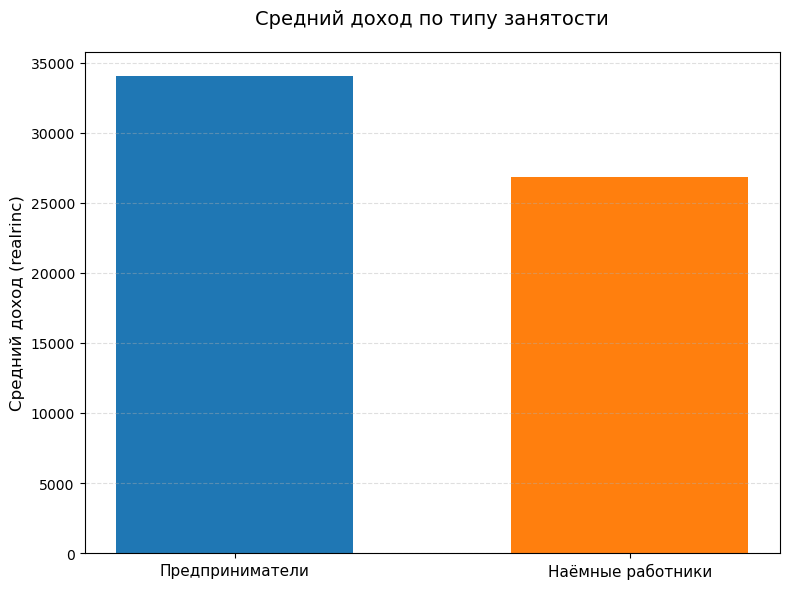

In [28]:
plt.figure(figsize=(8, 6))

bars = plt.bar(
    x=['Предприниматели', 'Наёмные работники'],
    height=mean_realrinc.values,
    color=['#1f77b4', '#ff7f0e'],
    width=0.6
)

plt.title('Средний доход по типу занятости', fontsize=14, pad=20)
plt.ylabel('Средний доход (realrinc)', fontsize=12)
plt.xticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show();

Из статистических показателей и графиков очевидно, что предприниматели в среднем зарабатывают на 27% больше, а это, в свою очередь, представляет значительную разницу в абсолютных (7.2 тыс. долларов) и относительных величинах.

<h2>Дополнительный анализ</h2>

<h3>1. Сколько среди предпринимателей мужчин и женщин?</h3>

In [29]:
gender_counts = df[df['wrkslf'] == 0]['sex'].value_counts()
gender_counts

sex
0.0    699
1.0    445
Name: count, dtype: int64

Как мы видим, среди предпринимателей числится 699 мужчин и 445 женщин. Визуализируем результат:

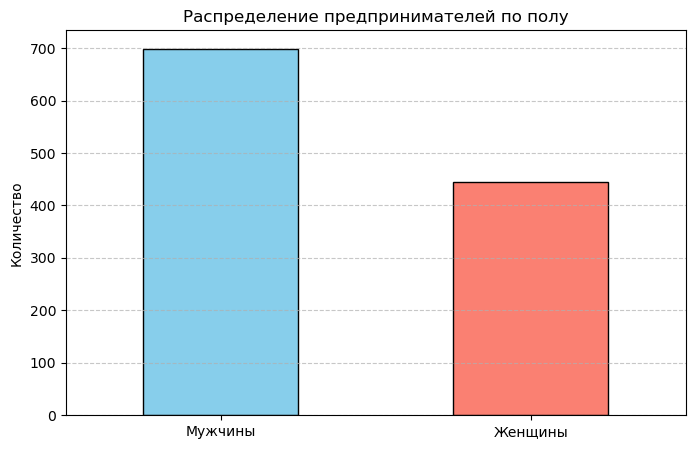

In [30]:
plt.figure(figsize=(8, 5))
gender_counts.index = ['Мужчины', 'Женщины'] 
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black',)
plt.title('Распределение предпринимателей по полу')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

<h3>2. Отличается ли количество рабочих часов у предпринимателей и наёмных рабочих?</h3>

In [31]:
hours = df.groupby('wrkslf')['hrs'].mean()
hours

wrkslf
0.0    39.648601
1.0    41.568885
Name: hrs, dtype: float64

Из полученных результатов можно сделать вывод, что среднее кол-во рабочих часов у самозанятых и наемных рабочих отличается незначительно - наемные работают примерно на 2 часа больше. Оба значения находятся близко к медианному времени рабочих часов (40 часов), что соответствует величине рабочих часов в неделю в США согласно законодательству страны.

Далее визуализируем результаты:

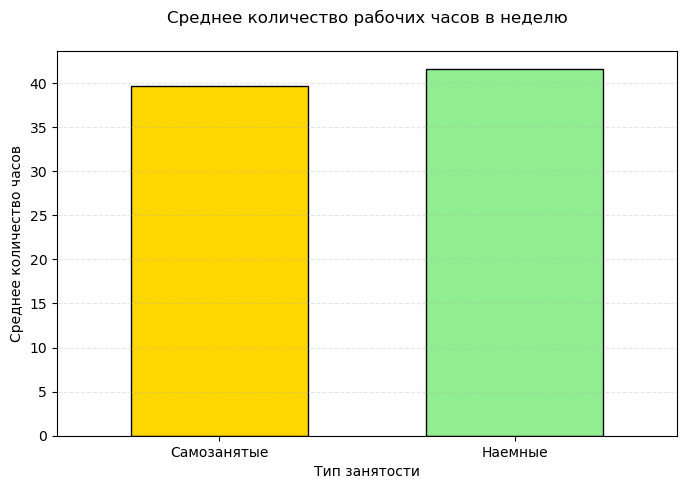

In [32]:
plt.figure(figsize=(8, 5))
hours.plot(kind='bar', 
           color=['gold', 'lightgreen'],
           edgecolor='black',
           width=0.6)

plt.title('Среднее количество рабочих часов в неделю', pad=20)
plt.xlabel('Тип занятости')
plt.ylabel('Среднее количество часов')
plt.xticks([0, 1], ['Самозанятые', 'Наемные'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show();

<h3>3. Какая доля предпринимателей имеет высшее образование?</h3>

Для начала проверим численность предпринимателей по всем уровням образования:

In [33]:
degree_self = df[df['wrkslf'] == 0]['degree'].value_counts().sort_index()
degree_self

degree
0.0    109
1.0    499
2.0     97
3.0    258
4.0    181
Name: count, dtype: int64

Далее вычислим долю предпринимателей с уровнем образования 3 (бакалавриат) и 4 (магистратура/аспирантура):

In [34]:
degree_self_high_educ = df[(df['wrkslf'] == 0) & ((df['degree'] == 3) | (df['degree'] == 4))].shape[0] / df[df['wrkslf'] == 0].shape[0]
degree_self_high_educ

0.38374125874125875

Визуализируем результат:

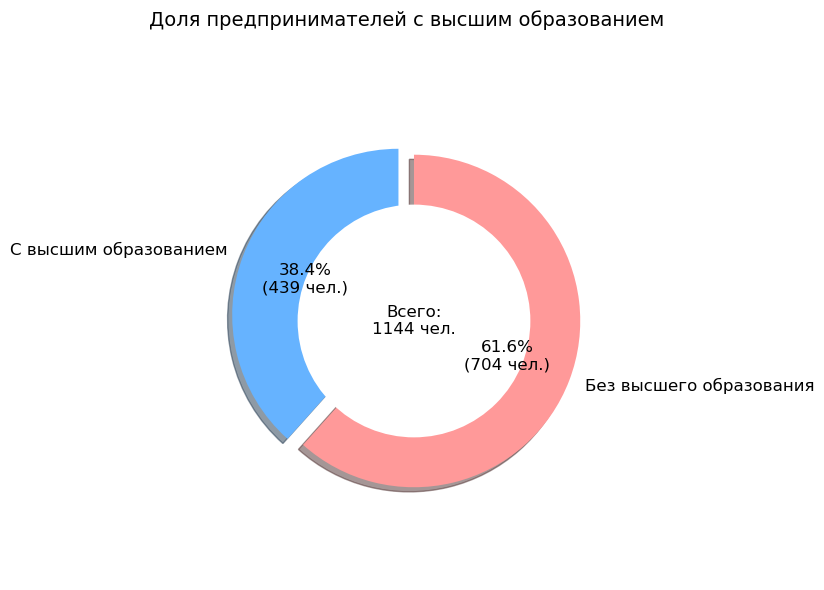

In [35]:
higher_ed = df[(df['wrkslf'] == 0) & ((df['degree'] == 3) | (df['degree'] == 4))].shape[0]
not_higher_ed = df[df['wrkslf'] == 0].shape[0] - df[(df['wrkslf'] == 0) & ((df['degree'] == 3) | (df['degree'] == 4))].shape[0]
explode = (0.1, 0)

labels = ['С высшим образованием', 'Без высшего образования']
sizes = [higher_ed, not_higher_ed]
colors = ['#66b3ff', '#ff9999']

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct=lambda p: f'{p:.1f}%\n({int(p*df[df['wrkslf'] == 0].shape[0]/100)} чел.)',
       shadow=True, startangle=90, textprops={'fontsize': 12})
ax.set_title('Доля предпринимателей с высшим образованием\n', fontsize=14)
ax.axis('equal')
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, f"Всего:\n{df[df['wrkslf'] == 0].shape[0]} чел.", 
         ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show();

<h3>4. Какой уровень образования у предпринимателей с высоким доходом?</h3>

Пусть высоким будет считаться доход, находящийся в 4 квартиле. Найдем соответствующий порог:

In [36]:
high_realrinc_threshold = df[df['wrkslf'] == 0]['realrinc'].quantile(0.75)
high_realrinc_threshold

39022.5

Отберем предпринимателей с уровнем дохода выше данного порога:

In [37]:
high_income_entrepreneurs = df[(df['wrkslf'] == 0) & (df['realrinc'] >= high_realrinc_threshold)]
high_income_entrepreneurs.head()

,wrkslf,sex,degree,realrinc,year,hrs
96,0.0,0.0,3.0,42735.00000,2010,70.0
108,0.0,1.0,3.0,72520.00000,2010,60.0
112,0.0,0.0,4.0,62160.00000,2010,40.0
144,0.0,1.0,4.0,109525.15854,2010,40.0
162,0.0,1.0,4.0,42735.00000,2010,25.0


Посмотрим, сколько таких предпринимателей:

In [38]:
high_income_entrepreneurs.shape[0]

292

Получим кол-ва значений каждого уровня:

In [39]:
education_dist = high_income_entrepreneurs['degree'].value_counts(normalize=True).sort_index()
education_dist

degree
0.0    0.027397
1.0    0.301370
2.0    0.047945
3.0    0.304795
4.0    0.318493
Name: proportion, dtype: float64

Визуализируем результат:

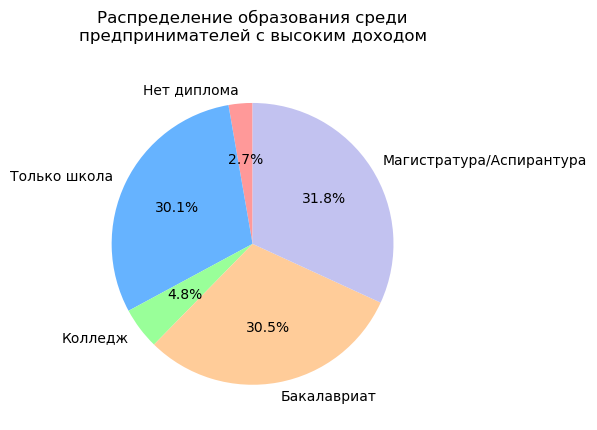

In [40]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels = ['Нет диплома', 'Только школа', 'Колледж', 'Бакалавриат', 'Магистратура/Аспирантура']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
plt.pie(education_dist, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Распределение образования среди\nпредпринимателей с высоким доходом', pad=20)
plt.show();

Для большей наглядности построим столбчатую диаграмму, где будут отображены конкретные числовые значения для каждого из уровней образования

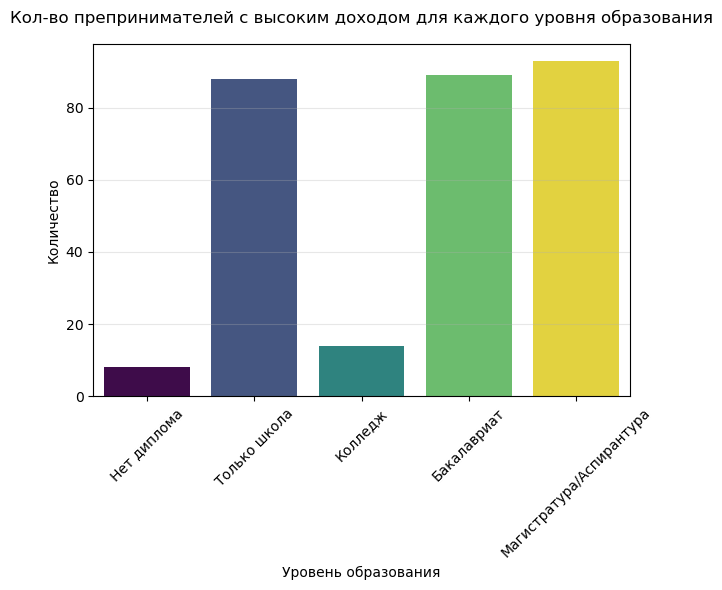

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.countplot(x='degree', data=high_income_entrepreneurs, 
              order=sorted(high_income_entrepreneurs['degree'].unique()),
              hue='degree',  # Добавлен параметр hue
              palette='viridis',
              legend=False)  # Отключаем легенду

plt.title('Кол-во препринимателей с высоким доходом для каждого уровня образования', pad=15)
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.xticks(ticks=range(5), labels=['Нет диплома', 'Только школа', 'Колледж', 'Бакалавриат', 'Магистратура/Аспирантура'], 
           rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show();

<h3>5. Сравнение дохода предпринимателей с высшим образованием и без него</h3>

Сравним средний доход предпринимателей с высшим образованием и без него:

In [42]:
# Отбираем только предпринимателей
entrepreneurs = df[df['wrkslf'] == 0].copy()

# Добавляем столбец с флагом высшего образования (degree = 3 или 4)
entrepreneurs['higher_education'] = entrepreneurs['degree'].isin([3, 4])

# Группировка и расчёт среднего дохода
realrinc_with_educ_mean = entrepreneurs.groupby('higher_education')['realrinc'].mean()
realrinc_with_educ_mean

higher_education
False    25511.502177
True     47834.300737
Name: realrinc, dtype: float64

Из результатов следует, что предприниматели с высшим образованием в среднем имеют доход, почти двукратно превышающий прибыль коммерсантов без высшего образования.

Визуализируем результат:

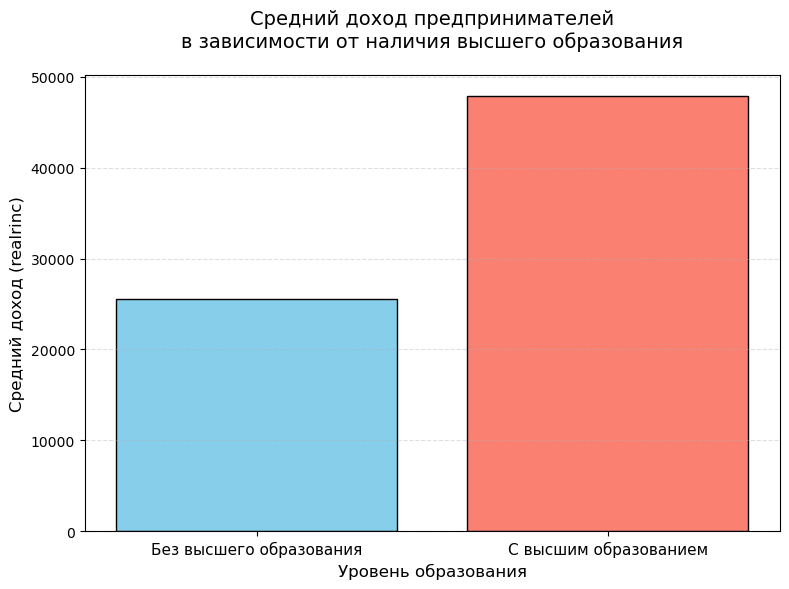

In [43]:
plt.figure(figsize=(8, 6))
bars = plt.bar(
    x=['Без высшего образования', 'С высшим образованием'],
    height=realrinc_with_educ_mean.values,
    color=['skyblue', 'salmon'],
    edgecolor='black',
    linewidth=1
)

plt.title('Средний доход предпринимателей\nв зависимости от наличия высшего образования', fontsize=14, pad=20)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Средний доход (realrinc)', fontsize=12)
plt.xticks(fontsize=11, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show();

Теперь сравним медианный доход предпринимателей с высшим образованием и без него:

In [44]:
# Расчёт медианного дохода
realrinc_with_educ_median = entrepreneurs.groupby('higher_education')['realrinc'].median()
realrinc_with_educ_median

higher_education
False    13007.5
True     29430.0
Name: realrinc, dtype: float64

Такие показатели свидетельствуют о том, что медианный предприниматель с высшим образованием имеет более чем в 2 раза высокую прибыль, нежели самозанятые рабочие без высшего образования.

Визуализируем результат:

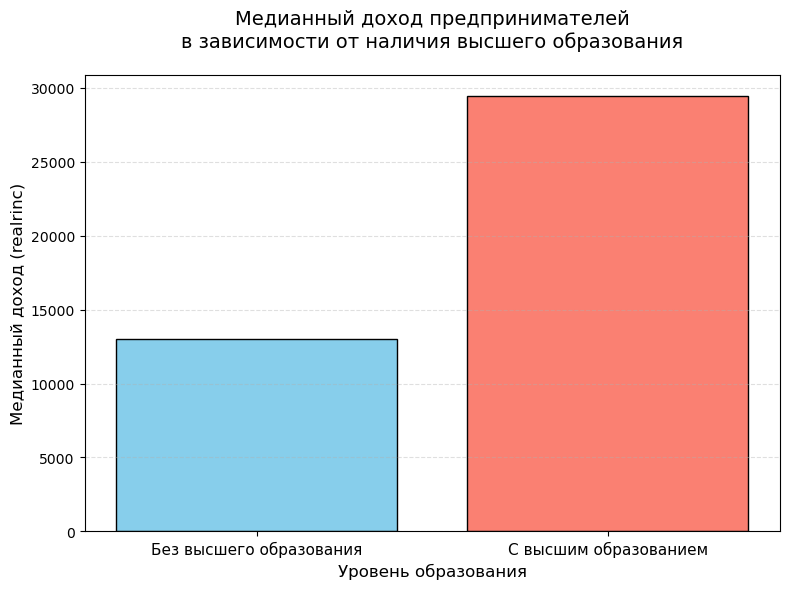

In [45]:
plt.figure(figsize=(8, 6))
bars = plt.bar(
    x=['Без высшего образования', 'С высшим образованием'],
    height=realrinc_with_educ_median.values,
    color=['skyblue', 'salmon'],
    edgecolor='black',
    linewidth=1
)

plt.title('Медианный доход предпринимателей\nв зависимости от наличия высшего образования', fontsize=14, pad=20)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Медианный доход (realrinc)', fontsize=12)
plt.xticks(fontsize=11, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show();

<h3>6. Сравнение дохода предпринимателей без высшего образования и наемных рабочих</h3>

Аналогично предыдущему заданию, начнем сравнительный анализ со среднего дохода предпринимателей без высшего образования и всех наемных рабочих:

In [46]:
# Вычисление среднего дохода предпринимателей без высшего образования
entrepreneurs = df[(df['wrkslf'] == 0) & (df['degree'].isin([0, 1, 2]))]['realrinc'].mean()

# Вычисление среднего дохода наемных рабочих
employees = df[df['wrkslf'] == 1]['realrinc'].mean()

print('Средний доход предпринимателей без высшего образования:' ,entrepreneurs)
print('Средний доход наемных рабочих:', employees)

Средний доход предпринимателей без высшего образования: 25511.50217655319
Средний доход наемных рабочих: 26830.94582821006


Различие в доходах минимально (~5%), что не является существенным экономическим разрывом. Это может указывать на то, что в данной выборке предпринимательство без высшего образования не даёт значимых финансовых преимуществ или что наёмные работники в среднем имеют более стабильный доход.

Визуализируем результат:

In [47]:
groups = ['Предприниматели\n(без высшего образования)', 'Наёмные работники']
means = [entrepreneurs, employees]

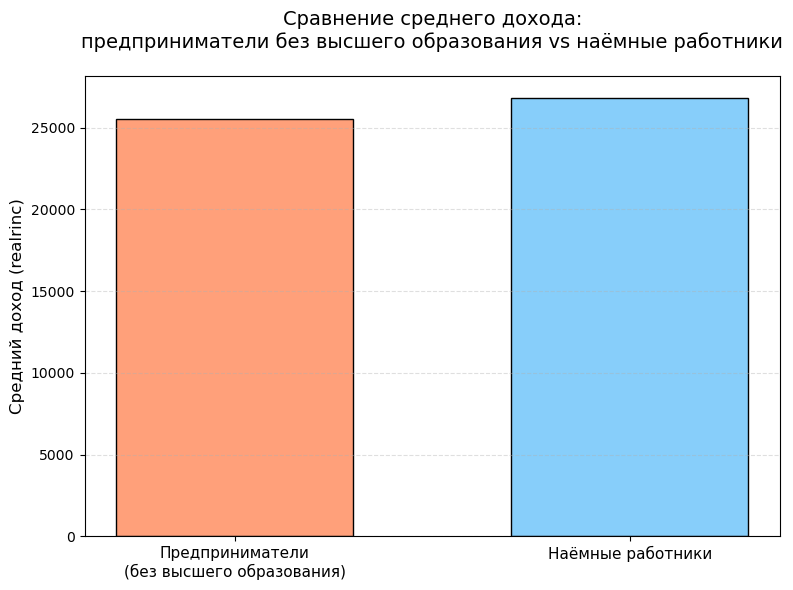

In [48]:
plt.figure(figsize=(8, 6))

colors = ['#FFA07A', '#87CEFA']
bars = plt.bar(groups, means, color=colors, edgecolor='black', width=0.6)
plt.title('Сравнение среднего дохода:\nпредприниматели без высшего образования vs наёмные работники', 
          fontsize=14, pad=20)
plt.ylabel('Средний доход (realrinc)', fontsize=12)
plt.xticks(fontsize=11, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show();

Сравним медианные доходы тех же самых групп:

In [49]:
# Вычисление медианного дохода предпринимателей без высшего образования
entrepreneurs = df[(df['wrkslf'] == 0) & (df['degree'].isin([0, 1, 2]))]['realrinc'].median()

# Вычисление медианного дохода наемных рабочих
employees = df[df['wrkslf'] == 1]['realrinc'].median()

print('Медианный доход предпринимателей без высшего образования:' ,entrepreneurs)
print('Медианный доход наемных рабочих:', employees)

Медианный доход предпринимателей без высшего образования: 13007.5
Медианный доход наемных рабочих: 19620.0


В отличие от сравнения средних, медианы показывают более существенный разрыв (~50% против 5% в случае среднего дохода). Это свидетельствует, что среднестатистический наёмный работник зарабатывает значительно больше среднестатистического предпринимателя без высшего образования. Вероятно, это связано как раз с уровнем образования, а также с высоким финансовым риском у предпринимателей и, наоборот, более стабильным и предсказуемым доходом у наемных рабочих.

Визуализируем результат:

In [50]:
groups = ['Предприниматели\n(без высшего образования)', 'Наёмные работники']
medians = [entrepreneurs, employees]

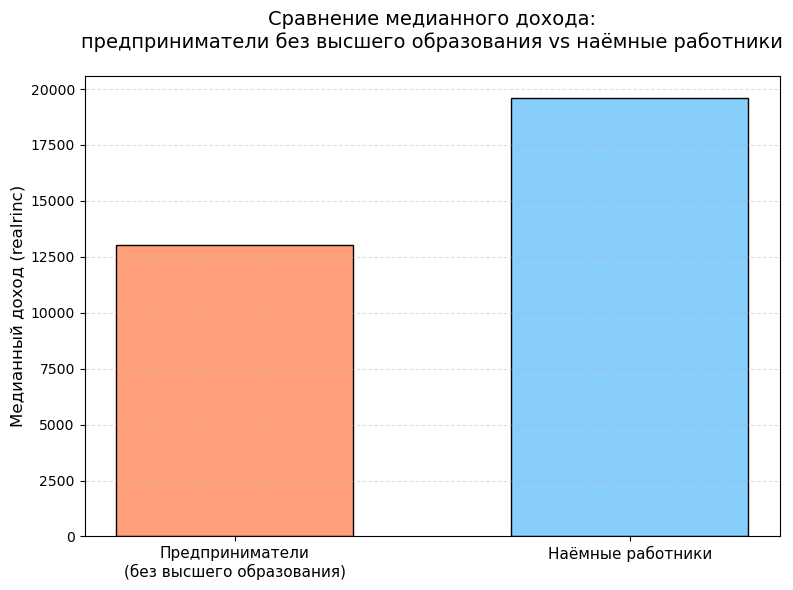

In [51]:
plt.figure(figsize=(8, 6))

colors = ['#FFA07A', '#87CEFA']
bars = plt.bar(groups, medians, color=colors, edgecolor='black', width=0.6)
plt.title('Сравнение медианного дохода:\nпредприниматели без высшего образования vs наёмные работники', 
          fontsize=14, pad=20)
plt.ylabel('Медианный доход (realrinc)', fontsize=12)
plt.xticks(fontsize=11, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show();

Проверка гипотез.

Гипотеза: Предпрениматели в среднем зарабатывают больше, чем наёмные рабочие

In [52]:
print("Средний заработок предпринимателей:", round(df[df['wrkslf'] == 0].realrinc.mean()))
print("Средний заработок наёмных рабочих:", round(df[df['wrkslf'] == 1].realrinc.mean()))

Средний заработок предпринимателей: 34078
Средний заработок наёмных рабочих: 26831


В среднем предприниматели зарабатывают больше, чем наёмные рабочие. Проверим является ли эта разница статистически значимой.

In [53]:
from scipy.stats import shapiro

Проверяем данные на нормальность с помощью теста Шапиро-Уилка
Поскольку данные перекошены - логарифмируем их.

In [54]:
df['realrinc_log'] = np.log1p(df['realrinc'])

In [55]:
print("Результаты теста Шапиро-Уилка по предпринимателям:", shapiro(df[df['wrkslf'] == 0].realrinc_log))
print("Результаты теста Шапиро-Уилка по наёмным рабочим:", shapiro(df[df['wrkslf'] == 1].realrinc_log))

Результаты теста Шапиро-Уилка по предпринимателям: ShapiroResult(statistic=0.970509494515235, pvalue=1.6811186652537506e-14)
Результаты теста Шапиро-Уилка по наёмным рабочим: ShapiroResult(statistic=0.9427141260526313, pvalue=6.817486832261498e-49)


C:\Users\Hroft\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8369.
  res = hypotest_fun_out(*samples, **kwds)


Поскольку данных слишком много, тест Шапиро-Уилка может быть слишком чувствительным, проведём тест Агостино-Пирсон.

In [56]:
from scipy.stats import normaltest

In [57]:
print("Результаты теста Агостино-Пирсон по предпринимателям:", normaltest(df[df['wrkslf'] == 0].realrinc_log))
print("Результаты теста Агостино-Пирсон по наёмным рабочим:", normaltest(df[df['wrkslf'] == 1].realrinc_log))

Результаты теста Агостино-Пирсон по предпринимателям: NormaltestResult(statistic=81.6045315086897, pvalue=1.9045883948698022e-18)
Результаты теста Агостино-Пирсон по наёмным рабочим: NormaltestResult(statistic=1404.0039283211804, pvalue=1.3317437884379182e-305)


Результаты обоих тестов показали очень маленькое значение p-value, это значит, что распределение не является нормальным для каждой группы. Поэтому для проверки гипотезы используем непараметрический тест Манна-Уитни.  
Гипотеза H0: Предприниматели зарабатывают меньше или столько же, сколько и наёмные рабочие.  
Гипотеза H1: Предприниматели зарабатывают больше чем наёмные рабочие.

In [58]:
from scipy.stats import mannwhitneyu

In [59]:
stat, p = mannwhitneyu(df[df['wrkslf'] == 0].realrinc_log, df[df['wrkslf'] == 1].realrinc_log, alternative='greater')
print("p-value:", p)

p-value: 0.7479673147902337


Тест показал очень высокое значение p-value, а значит мы не можем отвергунть гипотезу о том, что предприниматели зарабатывают меньше или столько же, сколько наёмные рабочие.  
Вывод: по результатам теста заработок предпринимателей не больше, чем наёмных рабочих.

In [60]:
print("Медианный заработок предпринимателей:", round(df[df['wrkslf'] == 0].realrinc.median()))
print("Медианный заработок наёмных рабочих:", round(df[df['wrkslf'] == 1].realrinc.median()))

Медианный заработок предпринимателей: 18390
Медианный заработок наёмных рабочих: 19620


Как видим медианные значения не сильно отличаются, что только подтверждает результаты теста

# Отличается ли количество рабочих часов у предпринимателей и наёмных рабочих?

Посмотрим среднее и медиану для обоих групп.

In [61]:
print("Среднее количество рабочих часов в неделю у предпринимателей:", round(df[df['wrkslf'] == 0].hrs.mean()))
print("Среднее количество рабочих часов в неделю у наёмных рабочих:", round(df[df['wrkslf'] == 1].hrs.mean()))
print("Медиана количества рабочих часов в неделю у предпринимателей:", round(df[df['wrkslf'] == 0].hrs.median()))
print("Медиана количества рабочих часов в неделю у наёмных рабочих:", round(df[df['wrkslf'] == 1].hrs.median()))

Среднее количество рабочих часов в неделю у предпринимателей: 40
Среднее количество рабочих часов в неделю у наёмных рабочих: 42
Медиана количества рабочих часов в неделю у предпринимателей: 40
Медиана количества рабочих часов в неделю у наёмных рабочих: 40


Для сравнения количества рабочих часов у предпринимателей и наёмных рабочих также проведём статистический тест.
Для начала выясним тип распределения.

In [62]:
print("Результаты теста Агостино-Пирсон по предпринимателям:", normaltest(df[df['wrkslf'] == 0].hrs))
print("Результаты теста Агостино-Пирсон по наёмным рабочим:", normaltest(df[df['wrkslf'] == 1].hrs))

Результаты теста Агостино-Пирсон по предпринимателям: NormaltestResult(statistic=27.284649461852602, pvalue=1.1890870490789357e-06)
Результаты теста Агостино-Пирсон по наёмным рабочим: NormaltestResult(statistic=380.79322996447036, pvalue=2.0502212953400466e-83)


Как видими распределение для обоих групп не является нормальным, поэтому для проверки гипотезы используем тест Манна-Уитни.  
Гипотеза H0: Количество рабочих часов предпринимателей и наёмных рабочих не отличается.  
Гипотеза H1: Количество рабочих часов предпринимателей и наёмных рабочих имеет различия.  

In [63]:
stat, p = mannwhitneyu(df[df['wrkslf'] == 0].hrs, df[df['wrkslf'] == 1].hrs, alternative='two-sided')
print("p-value:", p)

p-value: 4.655489487883016e-06


По результатам теста p-value оказалось очень маленьким, это означает, что между группами есть различия.
Сформулируем новую гипотезу.
H0: Количество рабочих часов у предпринимателей меньше или столько же, сколько и у наёмных рабочих.
H1: Количество рабочих часов у предпринимателей больше, чем у наёмных рабочих.

In [64]:
stat, p = mannwhitneyu(df[df['wrkslf'] == 0].hrs, df[df['wrkslf'] == 1].hrs, alternative='greater')
print("p-value:", p)

p-value: 0.9999976723861042


По результатам теста p-value получилось очень большим, это говорит нам о том, что нет основания отвергать гипотезу H0.  
По результатам проведённых тестов количество рабочих часов у предпринимателей и нёмных рабочих отличается, но предпрениматели работают не больше, чем наёмные рабочие, значит мы можем сделать вывод, что количество рабочих часов у наёмных рабочих больше, чем у предпринимателей.

In [65]:
print("Дисперсия для предпринимателей", df[df['wrkslf'] == 0].hrs.std())
print("Дисперсия для наёмных рабочих", df[df['wrkslf'] == 1].hrs.std())

Дисперсия для предпринимателей 18.444182607476844
Дисперсия для наёмных рабочих 12.677508923939701


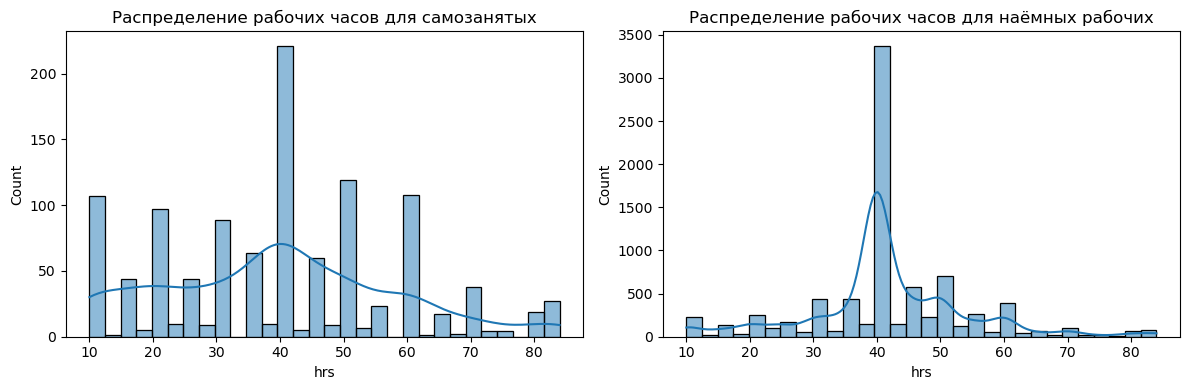

In [66]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[df['wrkslf'] == 0].hrs, bins=30, kde=True)
plt.title('Распределение рабочих часов для самозанятых')

plt.subplot(1, 2, 2)
sns.histplot(df[df['wrkslf'] == 1].hrs, bins=30, kde=True)
plt.title('Распределение рабочих часов для наёмных рабочих')

plt.tight_layout()
plt.show()

Несмотря на то, что средние и медианы количества рабочих часов у наёмных работников и самозанятых близки, статистический тест показал наличие значимой разницы между группами. Это объясняется тем, что у самозанятых значительно выше дисперсия рабочих часов — их распределение более растянуто и асимметрично.

Исходя из полученных результатов можем сделать вывод, что количество рабочих часов у самозанятых слишком разное по сравнению с наёмными рабочими, поэтому мы не можем сделать вывод, что самозанятые работают больше или меньше чем наёмные рабочие.

# Сравнить доход предпринимателей с высшим образованием и без него.

In [67]:
# Отбираем только предпринимателей
entrepreneurs = df[df['wrkslf'] == 0].copy()

# Добавляем столбец с флагом высшего образования (degree = 3 или 4)
entrepreneurs['higher_education'] = entrepreneurs['degree'].isin([3, 4])

Посмотрим средний и медианный доход предпринимателей с высшим образованием и без него.

In [68]:
print("Средний доход предпринимателей без высшего образования:", round(entrepreneurs[entrepreneurs['higher_education'] == 0].realrinc.mean()))
print("Средний доход предпринимателей с высшим образованием:", round(entrepreneurs[entrepreneurs['higher_education'] == 1].realrinc.mean()))
print("Средний доход предпринимателей без высшего образования:", round(entrepreneurs[entrepreneurs['higher_education'] == 0].realrinc.median()))
print("Средний доход предпринимателей с высшим образованием:", round(entrepreneurs[entrepreneurs['higher_education'] == 1].realrinc.median()))

Средний доход предпринимателей без высшего образования: 25512
Средний доход предпринимателей с высшим образованием: 47834
Средний доход предпринимателей без высшего образования: 13008
Средний доход предпринимателей с высшим образованием: 29430


Как видим средний и медианный уровень дохода предпринимателей с высшим образованием и без него достаточно сильно различается.  
Проведём статистический тест, чтобы убедиться, что данное различие является статистически значимым.

Проверяем тип распределения

In [69]:
print("Результаты теста Шапиро-Уилка по предпринимателям без высшего образования:", shapiro(entrepreneurs[entrepreneurs['higher_education'] == 0].realrinc))
print("Результаты теста Шапиро-Уилка по предпринимателям с высшим образованием:", shapiro(entrepreneurs[entrepreneurs['higher_education'] == 1].realrinc))

Результаты теста Шапиро-Уилка по предпринимателям без высшего образования: ShapiroResult(statistic=0.571833522927016, pvalue=2.6535020814852343e-38)
Результаты теста Шапиро-Уилка по предпринимателям с высшим образованием: ShapiroResult(statistic=0.7499965112289806, pvalue=3.128013866877434e-25)


Распределение не является нормальным, поэтому для проверки гипотезы используем тест Манна-Уитни.  
Сформулируем гипотезу.  
H0: Доход предпринимателей с высшим образованием меньше или равен дохода предпринимателей без высшего образования.  
H1: Доход предпринимателей с высшим образованием выше дохода предпринимателей без высшего образования.

In [70]:
stat, p = mannwhitneyu(entrepreneurs[entrepreneurs['higher_education'] == 1].realrinc, entrepreneurs[entrepreneurs['higher_education'] == 0].realrinc, alternative='greater')
print("p-value:", p)

p-value: 3.2521065431120856e-24


Тест показал очень маленькое значение p-value, это означает, что мы принимаем альтернативную гипотезу.  
Доход предпринимателей с высшим образованием действительно выше дохода предпринимателей без высшего образования.

# Сравнить доход предпринимателей без высшего образования и наёмных рабочих

In [71]:
entrep = df[(df['wrkslf'] == 0) & df['degree'].isin([0, 1, 2])]
h_workers = df[df['wrkslf'] == 1]

In [72]:
print("Средний доход предпринимателей без высшего образования:", round(entrep.realrinc.mean()))
print("Средний доход наёмных рабочих:", round(h_workers.realrinc.mean()))
print("Медианный доход предпринимателей без высшего образования:", round(entrep.realrinc.median()))
print("Медианный доход наёмных рабочих:", round(h_workers.realrinc.median()))

Средний доход предпринимателей без высшего образования: 25512
Средний доход наёмных рабочих: 26831
Медианный доход предпринимателей без высшего образования: 13008
Медианный доход наёмных рабочих: 19620


Проверим, является ли распределение нормальным для групп.

In [73]:
print("Результаты теста Агостино-Пирсон по предпринимателям без высшего образования:", normaltest(entrep.realrinc))
print("Результаты теста Агостино-Пирсон по наёмным рабочим:", normaltest(h_workers.realrinc))

Результаты теста Агостино-Пирсон по предпринимателям без высшего образования: NormaltestResult(statistic=619.9067851004232, pvalue=2.448792397309362e-135)
Результаты теста Агостино-Пирсон по наёмным рабочим: NormaltestResult(statistic=8166.4992991262025, pvalue=0.0)


По результатам теста, распределение не является нормальным, поэтому для проверки гипотезы используем тест Манна-Уитни.

Сформулируем гипотезу.  
H0: Доход наёмных рабочих такой же или ниже, чем доход предпринимателей без высшего образования.  
H1: Доход наёмных рабочих выше, чем доход предпринимателей без высшего образования.

In [74]:
stat, p = mannwhitneyu(h_workers.realrinc, entrep.realrinc, alternative='greater')
print("p-value:", p)

p-value: 1.6212670395054514e-14


Тест показал очень маленькое значение p-value, это значит, что мы принимаем альтернативную гипотезу, а именно - доход наёмных рабочих выше, чем доход предпринимателей без образования.

# Выводы

1. Предприниматели зарабатывают в среднем значительно больше, чем наемные рабочие. Однако медианный заработок почти не отличается. По результатам статистического теста можем сделать вывод, что статистически значимой разницы в уровне заработка между самозанятыми и наёмными рабочими нет.
2. Количество рабочих часов у самозанятых и наемных сотрудников отличается несущественно. Оба значения близки к медианному по всем данным, что совпадает с трудовой нормой рабочей недели. Однако статистический тест Манна-Уитни говорит нам о том, что статистически значимая разница есть. Судя по графиками распределения у самозанятых количество рабочих часов может сильно отличатся от очень маленького до очень большого количества, тогда как у наймных рабочих это значение мало размыто. Исходя из полученных результатов можем сделать вывод, что количество рабочих часов у самозанятых слишком разное по сравнению с наёмными рабочими, поэтому мы не можем сделать вывод, что самозанятые работают больше или меньше чем наёмные рабочие.
3. Мужчин-предпринимателей на 57% больше, чем женщин. Следовательно, мужчины являются подавляющей частью среди самозанятых работников.
4. Предпринимателей с высшим образованием - меньшинство (38%), однако высокий доход имеют преимущественно выпускники высших учебных заведений (62%).
5. Предприниматели с высшим образованием имеют гораздо большую доходность, нежели предприниматели, неокончившие или никогда не проходившие обучение в ВУЗах. Это дает возможность предположить, что доход может сильно коррелировать с уровнем полученного образования.
6. Предприниматели без высшего образования имеют меньшую доходность (особенно, медианную), чем наемные рабочие (с любым уровнем образования), статистический тест также это подтверждает. Такой вывод позволяет с большей уверенностью допустить, что уровень образования существенно влияет на уровень дохода.